328.3167383627364 43.139257399291665


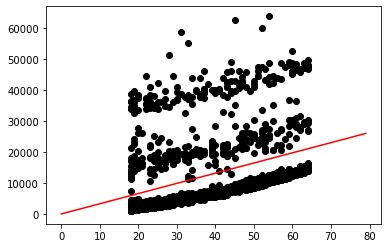

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('insurance.csv')


def mean_square_error(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].age
        y = points.iloc[i].charges
        total_error += (y - (m*x + b))** 2
    total_error/float(len(points))
    
def gradient_descent(m_now, b_now, points,  L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].age
        y = points.iloc[i].charges
        
        m_gradient += -(2/n) * x * (y -(m_now *x + b_now))
        b_gradient += -(2/n) * (y -(m_now *x + b_now))
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    
    return m,b


m = 0
b= 0
L = 0.0001
epochs =500

for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    
    
print(m,b)
plt.scatter(data.age, data.charges, color="black")
plt.plot(list(range(0, 80)), [m*x + b for x in range(0, 80)], color="red")
plt.show()
# print(data)
# plt.scatter(data.age, data.charges)
# plt.show()

In [22]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

data = pd.read_csv('insurance.csv')
x = data.age
y = data.charges

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 23)

x_train  = np.array(x_train).reshape(-1,1)
x_test  = np.array(x_test).reshape(-1,1)

# print(x_train)
# print(x_test)


lr = LinearRegression()

lr.fit(x_train, y_train)
 
# c= lr.intercept_
print(c)

m = lr.coef_
# print(m)

[246.52754709]


In [26]:
y_pred_train = m*x_train + c
# print(y_pred_train)
y_pred_train.flatten()

array([12185.76504781,  8241.32429439,  8734.37938857, ...,
       10706.59976528, 16623.26089542, 14897.56806579])

Text(0, 0.5, 'chrg')

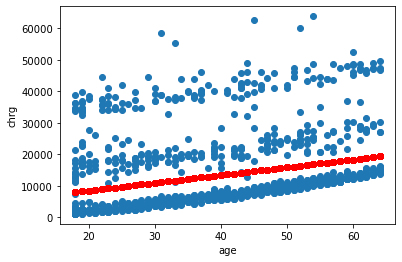

In [35]:
y_pred_train1 = lr.predict(x_train)
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_pred_train1, color="red")
plt.xlabel("age")
plt.ylabel("chrg")